# Supervised Learning using Gaussian Naive Bayes

## Steps

1. EDA - including missing value replacement and correlation analysis 
2. Check for normality and identify predictors
3. Attribute selection & build GNB iteration 1 
4. Attribute selection & build GNB iteration 2 
5. Calculate and compare Accuracy Confusion Matrix and RoC 

## Import of necessary packages 

In [1]:
# Pandas and Numpy libraries
import pandas as pd
import numpy as np

# For preprocessing the data
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split

# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score

# To build the Confusion Matrix
from sklearn.metrics import confusion_matrix

# To report the prediction shape 
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

# To use Shapiro test for normality 
from scipy.stats import shapiro

# To plot graphs (visualization)
import seaborn as sns
sns.set(color_codes=True)
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline 

## Dataset attribute information
 1. Number of times pregnant 
 2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
 3. Diastolic blood pressure (mm Hg) 
 4. Triceps skin fold thickness (mm) 
 5. 2-Hour serum insulin (mu U/ml) 
 6. Body mass index (weight in kg/(height in m)^2) 
 7. Diabetes pedigree function 
 8. Age (years) 
 9. Class variable (0 or 1)

## Dataset loading and basic analysis 

In [2]:
PIMA_data = pd.read_csv("pima-indians-diabetes+(3).csv")

##### A quick look at the data set, columns and values using head()

In [3]:
PIMA_data.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### Check dimensions of the data set in terms of rows and columns using shape and size

In [4]:
print(PIMA_data.shape)

(768, 9)


In [5]:
print(PIMA_data.size)

6912


##### Explore the data set in terms of its columns, null values, data types, memory etc. using info()

In [6]:
PIMA_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##### Data set has no null values for any of its columns, as all columns have 768 non-null values which is equal to the total count of rows. 

In [7]:
PIMA_data.columns = ['Pregnancies','Glucose','BloodPressure',
                     'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']

In [8]:
PIMA_data.groupby("Outcome").size()

Outcome
0    500
1    268
dtype: int64

##### Data seems to be skewed in terms of the Outcome

##### Explore the continuous variables in terms of their range and basic statistics using describe() 

In [9]:
PIMA_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Exploratory Data Analysis

EDA for this dataset has been done in detail as a part of Module 1 assignment named 
"AIML2019_Module1_Project_Sudarshan_Vaidya". 

Hence only analysis relevant to the present assignment like Zero values replacement, Correlation etc. 
has been covered here. 


## Zero Values Analysis

##### There are no null values in the dataset as can be seen from the dia.info() output, 
but there are some values in below attributes that are zero: 

1. Pregnancies - zero makes sense in real life 
2. Glucose - zero has no sense in real life 
3. BloodPressure - zero has no sense in real life 
4. SkinThickness - zero has no sense in real life 
5. Insulin - zero has no sense in real life 
6. BMI - zero has no sense in real life 

Since zero values in these attributes make no sense in real life, except for 'Pregnancies', which can be zero, 
these zero values may be excluded. 
However, this decision of dropping zero values can be taken after exploring more on count of these zero values.
 

In [10]:
zerocount = PIMA_data[PIMA_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]==0].describe()

print(zerocount)

print((PIMA_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]==0).sum())

       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
count          0.0      5.0           35.0          227.0    374.0  11.0   
mean           NaN      0.0            0.0            0.0      0.0   0.0   
std            NaN      0.0            0.0            0.0      0.0   0.0   
min            NaN      0.0            0.0            0.0      0.0   0.0   
25%            NaN      0.0            0.0            0.0      0.0   0.0   
50%            NaN      0.0            0.0            0.0      0.0   0.0   
75%            NaN      0.0            0.0            0.0      0.0   0.0   
max            NaN      0.0            0.0            0.0      0.0   0.0   

       DiabetesPedigreeFunction  Age  Outcome  
count                       0.0  0.0      0.0  
mean                        NaN  NaN      NaN  
std                         NaN  NaN      NaN  
min                         NaN  NaN      NaN  
25%                         NaN  NaN      NaN  
50%                        

##### No of zeroes in above Columns

Glucose - 5

BloodPressure - 35 

SkinThickness - 227 

Insulin - 374 

BMI - 11


## Replacement of zero values with median

##### Find out Glucose median and replace zero values

In [11]:
median_Glucose = PIMA_data[['Glucose']][PIMA_data[['Glucose']]>0].median()
median_Glucose

Glucose    117.0
dtype: float64

In [12]:
PIMA_data['Glucose'] = PIMA_data['Glucose'].replace([0],median_Glucose)
                          
# To check if zeroes has been replaced
print((PIMA_data['Glucose']==0).sum())

0


##### Find out BloodPressure median and replace zero values

In [13]:
median_BloodPressure = PIMA_data[['BloodPressure']][PIMA_data[['BloodPressure']]>0].median()
median_BloodPressure

BloodPressure    72.0
dtype: float64

In [14]:
PIMA_data['BloodPressure'] = PIMA_data['BloodPressure'].replace([0],median_BloodPressure)
                          
# To check if zeroes has been replaced
print((PIMA_data['BloodPressure']==0).sum())

0


##### Find out SkinThickness median and replace zero values

In [15]:
median_SkinThickness = PIMA_data[['SkinThickness']][PIMA_data[['SkinThickness']]>0].median()
median_SkinThickness

SkinThickness    29.0
dtype: float64

In [16]:
PIMA_data['SkinThickness'] = PIMA_data['SkinThickness'].replace([0],median_SkinThickness)
                          
# To check if zeroes has been replaced
print((PIMA_data['SkinThickness']==0).sum())

0


##### Find out Insulin median and replace zero values

In [17]:
median_Insulin = PIMA_data[['Insulin']][PIMA_data[['Insulin']]>0].median()
median_Insulin

Insulin    125.0
dtype: float64

In [18]:
PIMA_data['Insulin'] = PIMA_data['Insulin'].replace([0],median_Insulin)
                          
# To check if zeroes has been replaced
print((PIMA_data['Insulin']==0).sum())

0


##### Find out BMI median and replace zero values

In [19]:
median_BMI = PIMA_data[['BMI']][PIMA_data[['BMI']]>0].median()
median_BMI

BMI    32.3
dtype: float64

In [20]:
PIMA_data['BMI'] = PIMA_data['BMI'].replace([0],median_BMI)
                          
# To check if zeroes has been replaced
print((PIMA_data['BMI']==0).sum())

0


##### Create correlation matrix for the data frame

In [21]:
corr = PIMA_data.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


##### Heat Map for correlation matrix 

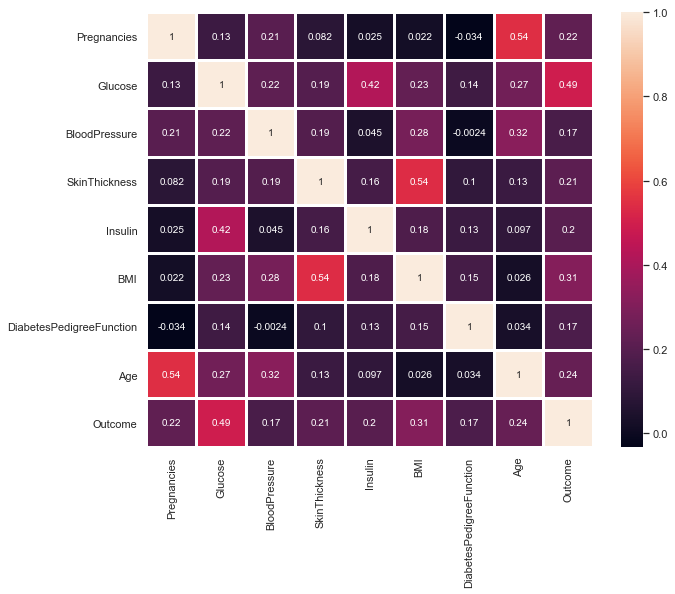

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True,linewidths=2)

##### Inference from Correlation heat map:
1. All correlation values are less than 0.6, which means there is relatively less correlation betwwen 
various attributes and also the Outcome. 
2. Top three attribute pairs with highest correlation are:
    a. Pregnancies-Age (0.54) 
    b. SkinThickness-BMI (0.54) 
    c. Glucose-Insulin (0.42)
    So, only one value from each of these pairs can be used as predictors for the Outcome. 
3. Outcome has positive correlation with all the attributes without any exception. 
4. BloodPressure has least correlation with Outcome.
5. DiabetesPedigreeFunction has a low correlation with Outcome. 

##### Identify Best Predictors
Top 3 attributes with highest correlation with Outcome are:
1. Glucose (as Insulin not considered due to high correlation) 
2. BMI (as SkinThickness not considered due to high correlation)
3. Age (as Pregnancies not considered due to high correlation)
4. Additionally, DiabetesPedigreeFunction may also be considered, as it is least correlated to others. 

##### Conduct test to check normality of the data 

In [23]:
shapiro(PIMA_data['Glucose'])

(0.9696223139762878, 1.5240374934277767e-11)

In [24]:
shapiro(PIMA_data['BMI'])

(0.979444146156311, 6.441978950277871e-09)

In [25]:
shapiro(PIMA_data['DiabetesPedigreeFunction'])

(0.8365186452865601, 2.477696547502535e-27)

In [26]:
shapiro(PIMA_data['Age'])

(0.8747662305831909, 2.401946561183188e-24)

In [27]:
shapiro(PIMA_data['BloodPressure'])

(0.9878154993057251, 5.2496684475045186e-06)

##### Conclusion for Normality
Shapiro test for normality have very low values for all variables. 
This indicates that values in all 5 variables above are normally distributed. 


## Iteration 1: Consider Glucose, BMI, DiabetesPedigreeFunction, Age

## Variable Selection and Standardization

In [28]:
X_features = pd.DataFrame(data = PIMA_data, columns = ['Glucose','BMI','DiabetesPedigreeFunction','Age'])
X_features.head()

,Glucose,BMI,DiabetesPedigreeFunction,Age
0,148.0,33.6,0.627,50
1,85.0,26.6,0.351,31
2,183.0,23.3,0.672,32
3,89.0,28.1,0.167,21
4,137.0,43.1,2.288,33


In [31]:
rescaledX = StandardScaler().fit_transform(X_features)

X = pd.DataFrame(data = rescaledX, columns= X_features.columns)
X.head()

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Glucose,BMI,DiabetesPedigreeFunction,Age
0,0.866045,0.166619,0.468492,1.425995
1,-1.205066,-0.852200,-0.365061,-0.190672
2,2.016662,-1.332500,0.604397,-0.105584
3,-1.073567,-0.633881,-0.920763,-1.041549
4,0.504422,1.549303,5.484909,-0.020496


In [32]:
y = PIMA_data.iloc[:,8]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

## Split Training and Testing Sets

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 25, test_size = 0.3)

In [34]:
y_train

584    1
237    1
715    1
758    0
189    1
4      1
292    1
371    0
296    1
128    1
360    1
591    0
542    1
425    1
226    0
341    0
123    0
152    1
480    1
159    1
377    0
551    0
538    0
698    0
714    0
564    0
115    1
621    0
33     0
587    0
      ..
303    1
650    0
160    0
649    0
548    0
562    0
109    1
492    0
656    0
201    0
559    0
304    0
406    1
131    1
259    1
88     1
167    0
641    0
453    0
500    0
253    0
156    0
136    0
151    0
255    1
317    1
143    1
474    0
318    0
132    1
Name: Outcome, Length: 537, dtype: int64

In [35]:
X_train

,Glucose,BMI,DiabetesPedigreeFunction,Age
584,0.077050,-0.546554,0.649699,1.596171
237,1.885163,1.694848,0.646679,-0.871374
715,2.148161,0.210283,1.069496,0.064591
758,-0.514696,0.734247,-0.830159,-0.616111
189,0.570172,-0.124472,-0.334860,-0.701198
4,0.504422,1.549303,5.484909,-0.020496
292,0.208549,1.578412,2.271503,-0.190672
371,-0.120198,-0.022590,3.802703,-1.041549
296,0.800295,-0.648436,-0.407342,-0.360847
128,-0.153073,0.297610,-0.208015,0.575118


## Apply GNaiveBayes and Calculate Score

In [36]:
GB_Classifier = GaussianNB()
GB_Classifier.fit(X_train, y_train)
y_pred = GB_Classifier.predict(X_test)
score  = GB_Classifier.score(X_test,y_test)
print (score)

0.8051948051948052


## Calculate Confusion Matrix, Recall & Precision

In [37]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[138,  22],
       [ 23,  48]], dtype=int64)

In [38]:
y_pred.shape

(231,)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       160
           1       0.69      0.68      0.68        71

   micro avg       0.81      0.81      0.81       231
   macro avg       0.77      0.77      0.77       231
weighted avg       0.80      0.81      0.80       231



##### Inference for Iteration 1 - BloodPressure NOT included 
1. The model accuracy (score) is 80.52%
2. Precision and recall values are higher for non-diabetic compared to diabetic. 
This is because of the inherent skew in the available data, where the 'Outcome' has 500 zeros and 268 ones. 


## Plot ROC Curve

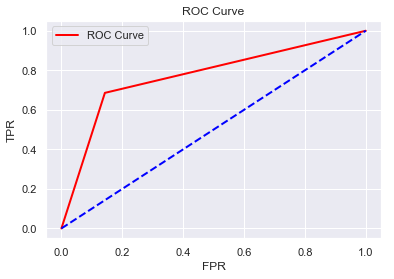

In [40]:
fpr, tpr,_=roc_curve(y_pred,y_test,drop_intermediate=False)
plt.figure()

##Adding the ROC
plt.plot(fpr, tpr, color='red', lw=2, label='ROC Curve')

##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')

##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()

## Iteration 2: Consider Glucose, BMI, DiabetesPedigreeFunction, Age and BloodPressure

## Variable Selection and Standardization

In [41]:
X_features = pd.DataFrame(data = PIMA_data, columns = ['Glucose','BMI','DiabetesPedigreeFunction',
                                                       'Age', 'BloodPressure'])
X_features.head()

,Glucose,BMI,DiabetesPedigreeFunction,Age,BloodPressure
0,148.0,33.6,0.627,50,72.0
1,85.0,26.6,0.351,31,66.0
2,183.0,23.3,0.672,32,64.0
3,89.0,28.1,0.167,21,66.0
4,137.0,43.1,2.288,33,40.0


In [42]:
rescaledX = StandardScaler().fit_transform(X_features)

X = pd.DataFrame(data = rescaledX, columns= X_features.columns)
X.head()

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Glucose,BMI,DiabetesPedigreeFunction,Age,BloodPressure
0,0.866045,0.166619,0.468492,1.425995,-0.031990
1,-1.205066,-0.852200,-0.365061,-0.190672,-0.528319
2,2.016662,-1.332500,0.604397,-0.105584,-0.693761
3,-1.073567,-0.633881,-0.920763,-1.041549,-0.528319
4,0.504422,1.549303,5.484909,-0.020496,-2.679076


In [43]:
y = PIMA_data.iloc[:,8]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

## Split Training and Testing Sets

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 25, test_size = 0.3)

In [45]:
y_train

584    1
237    1
715    1
758    0
189    1
4      1
292    1
371    0
296    1
128    1
360    1
591    0
542    1
425    1
226    0
341    0
123    0
152    1
480    1
159    1
377    0
551    0
538    0
698    0
714    0
564    0
115    1
621    0
33     0
587    0
      ..
303    1
650    0
160    0
649    0
548    0
562    0
109    1
492    0
656    0
201    0
559    0
304    0
406    1
131    1
259    1
88     1
167    0
641    0
453    0
500    0
253    0
156    0
136    0
151    0
255    1
317    1
143    1
474    0
318    0
132    1
Name: Outcome, Length: 537, dtype: int64

In [46]:
X_train

,Glucose,BMI,DiabetesPedigreeFunction,Age,BloodPressure
584,0.077050,-0.546554,0.649699,1.596171,0.298896
237,1.885163,1.694848,0.646679,-0.871374,1.456996
715,2.148161,0.210283,1.069496,0.064591,-1.851862
758,-0.514696,0.734247,-0.830159,-0.616111,0.298896
189,0.570172,-0.124472,-0.334860,-0.701198,0.629782
4,0.504422,1.549303,5.484909,-0.020496,-2.679076
292,0.208549,1.578412,2.271503,-0.190672,0.464339
371,-0.120198,-0.022590,3.802703,-1.041549,-0.693761
296,0.800295,-0.648436,-0.407342,-0.360847,-0.197433
128,-0.153073,0.297610,-0.208015,0.575118,1.291553


## Apply GNaiveBayes and Calculate Score

In [47]:
GB_Classifier = GaussianNB()
GB_Classifier.fit(X_train, y_train)
y_pred = GB_Classifier.predict(X_test)
score  = GB_Classifier.score(X_test,y_test)
print (score)

0.7965367965367965


## Calculate Confusion Matrix, Recall & Precision

In [48]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[138,  22],
       [ 25,  46]], dtype=int64)

In [49]:
y_pred.shape

(231,)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       160
           1       0.68      0.65      0.66        71

   micro avg       0.80      0.80      0.80       231
   macro avg       0.76      0.76      0.76       231
weighted avg       0.79      0.80      0.80       231



##### Inference for Iteration 2 - BloodPressure included  
1. The model accuracy (score) is 79.65%
2. Precision and recall values are higher for non-diabetic compared to diabetic. 
This is because of the inherent skew in the available data, where the 'Outcome' has 500 zeros and 268 ones. 


## Plot ROC Curve

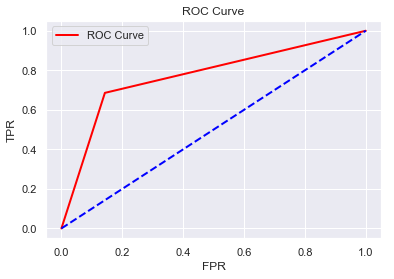

In [33]:
fpr, tpr,_=roc_curve(y_pred,y_test,drop_intermediate=False)
plt.figure()

##Adding the ROC
plt.plot(fpr, tpr, color='red', lw=2, label='ROC Curve')

##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')

##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()

## Inference - Model selection based on two iterations

Iteration 1 (BloodPressure NOT included) has higher accuracy (80.52%) than Iteration 2 (BloodPressure included), 
which has lower accuracy (79.65%).


Hence following are the four optimal indicators for building a Gaussian Naive Bayes model 

a. Glucose 

b. BMI 

c. DiabetesPedigreeFunction

d. Age